In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# # 获取数据

In [2]:
# 获取手写数字数据集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# 训练集数据维度的调整：N H W C
train_images = np.reshape(train_images,(train_images.shape[0],train_images.shape[1],train_images.shape[2],1))
# 测试集数据维度的调整：N H W C
test_images = np.reshape(test_images,(test_images.shape[0],test_images.shape[1],test_images.shape[2],1))

# # 定义两个方法随机抽取部分样本演示

In [3]:
# 获取训练集数据
def get_train(size):
    index = np.random.randint(0, np.shape(train_images)[0], size)  # 随机生成要抽样的样本的索引
    resized_images = tf.image.resize_with_pad(train_images[index], 277, 277)  # 将这些数据resize成227*227大小
    return resized_images.numpy(), train_labels[index]  # 返回抽取的训练样本

In [4]:
# 获取测试集数据 
def get_test(size):
    index = np.random.randint(0, np.shape(test_images)[0], size)  # 随机生成要抽样的样本的索引
    resized_images = tf.image.resize_with_pad(test_images[index], 277, 277)  # 将这些数据resize成227*227大小
    return resized_images.numpy(), test_labels[index]  # 返回抽样的测试样本

In [5]:
# 获取训练样本和测试样本
train_images,train_labels = get_train(256)
test_images,test_labels = get_test(128)

# # 数据集图像展示

In [6]:
# 绘图过程内中文乱码解决
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.unicode_minus'] = False

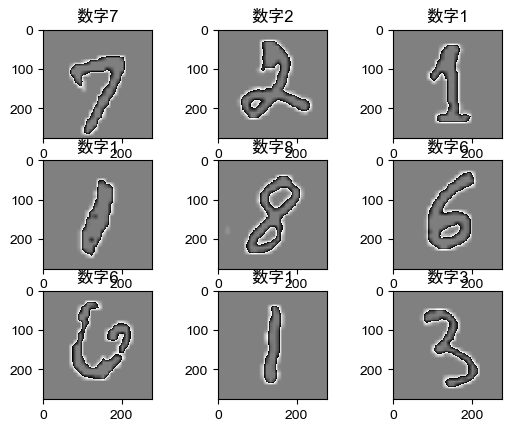

In [7]:
# 数据展示：将数据集的前九个数据集进行展示
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i].astype(np.int8).squeeze(), cmap='gray', interpolation='none')  # 以灰度图显示，不进行插值
    plt.title("数字{}".format(train_labels[i]))  # 设置图片的标题：对应的类别

# # 构建AlexNet模型

In [8]:
net = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    tf.keras.layers.Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'), 
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# # 模型编译

In [9]:
# 指定优化器，损失函数和评价指标
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)

net.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# # 模型训练

In [10]:
# 模型训练：指定训练数据，batchsize,epoch,验证集
net.fit(train_images,train_labels,batch_size=128,epochs=6,verbose=1,validation_split=0.1)

Epoch 1/6


2024-07-26 15:36:45.336662: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2/2 [==============================] - 9s 4s/step - loss: 23.8740 - accuracy: 0.1174 - val_loss: 44.9095 - val_accuracy: 0.1154
Epoch 2/6
2/2 [==============================] - 8s 4s/step - loss: 27.6800 - accuracy: 0.0783 - val_loss: 135.1468 - val_accuracy: 0.0385
Epoch 3/6
2/2 [==============================] - 8s 4s/step - loss: 487.8781 - accuracy: 0.1174 - val_loss: 4644.8911 - val_accuracy: 0.1154
Epoch 4/6
2/2 [==============================] - 8s 4s/step - loss: 3088686.5000 - accuracy: 0.1000 - val_loss: 22284922688294126774097549459456.0000 - val_accuracy: 0.1154
Epoch 5/6
2/2 [==============================] - 8s 4s/step - loss: nan - accuracy: 0.1609 - val_loss: nan - val_accuracy: 0.0769
Epoch 6/6
2/2 [==============================] - 8s 4s/step - loss: nan - accuracy: 0.1174 - val_loss: nan - val_accuracy: 0.0769


# # 模型评估

In [11]:
# 指定测试数据
net.evaluate(test_images,test_labels,verbose=1)

4/4 [==============================] - 1s 295ms/step - loss: nan - accuracy: 0.0938


[nan, 0.09375]